### Import and settings

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import quantstats as qs

from backtest_lib import Strategy, Backtest

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Define Strategy

In [28]:
class Test (Strategy):
    stock1 = "AAPL"
    stock2 = "GOOG"
    n_days = 0

    def on_start(self):
        
        qtd1 = int((self.broker.balance)/self.close["AAPL"])
        qtd2 = int((self.broker.balance)/self.close["GOOG"])

        order1 = self.buy(self.stock2, qtd2)
        #order2 = self.buy(self.stock2, qtd2)
        print("Bought %s AAPL and %s GOOG" % (qtd1, qtd2))

        self.t1 = self.new_trade(orders=[order1])
        self.t1.max_age = np.inf
        

    def on_end (self):
        #print("Finishing strategy...")
        pass


    def next(self):
        #self.buy(self.stock1, 1)
        #print("Buy", self.iteration)
        #print(self.iteration, len(self.data))
        pass


### Backtest

In [29]:
universe = ["AAPL", "GOOG"]

#ohlc = yf.download(universe, interval="1d", period="5y", group_by="ticker")
ohlc = yf.download(universe, interval="1d", period="5y")

ohlc.tail()


[*********************100%***********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL        GOOG        AAPL        GOOG        AAPL   
Date                                                                     
2023-05-15  172.070007  116.959999  172.070007  116.959999  173.210007   
2023-05-16  172.070007  120.089996  172.070007  120.089996  173.139999   
2023-05-17  172.690002  121.480003  172.690002  121.480003  172.929993   
2023-05-18  175.050003  123.519997  175.050003  123.519997  175.240005   
2023-05-19  175.160004  123.250000  175.160004  123.250000  176.389999   

                               Low                    Open              \
                  GOOG        AAPL        GOOG        AAPL        GOOG   
Date                                                                     
2023-05-15  118.794998  171.470001  116.480003  173.160004  116.489998   
2023-05-16  121.199997  171.800003  116.830002  171.990005  116.830002   
2023-05-17  122.279999  170.419998  119.459999  171.710007  120.180000   
2023-05-18  123.900002  172.580002  121.489998  173.000000  121.559998   
2023-05-19  126.478996  174.940002  122.720001  176.389999  124.199997   

              Volume            
                AAPL      GOOG  
Date                            
2023-05-15  37266700  22107900  
2023-05-16  42110300  32370100  
2023-05-17  57951600  26659600  
2023-05-18  65496700  27014500  
2023-05-19  55772400  30251300

In [30]:
bt = Backtest(data=ohlc, universe=universe, strategy=Test)

import matplotlib.pyplot as plt

result = bt.run()

Bought 223 AAPL and 185 GOOG


In [31]:
bt.broker.positions
print(bt.broker.balance)
print(bt.broker.equity)

,quantity,total_invested,value
ticker,,,
AAPL,223,-9996.718662,39060.680817


3.2813377380371094
39063.96215438843


In [32]:
bt.broker.orderbook

,iteration,timestamp,action,ticker,quantity,price,total
id,,,,,,,
0,0,2018-05-21,buy,AAPL,223,44.828335,-9996.718662


<AxesSubplot: xlabel='Date'>

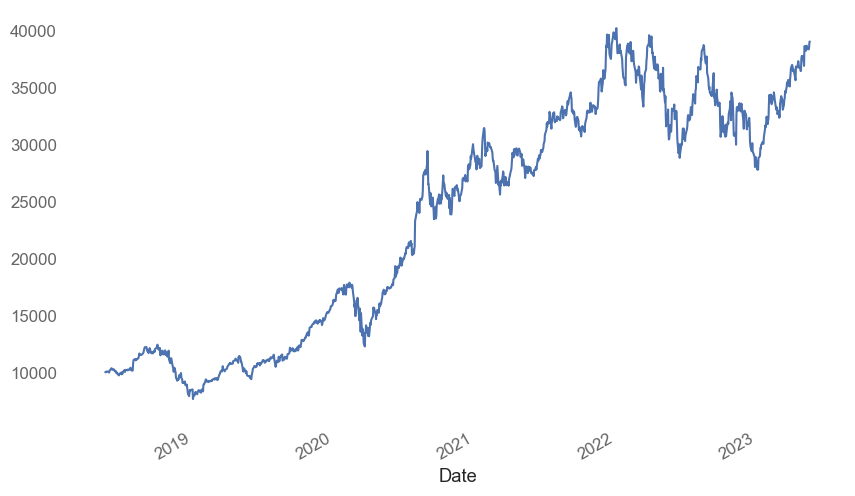

In [33]:
result.Equity.plot()
plt.grid()

In [34]:
(result.Equity[-1]/result.Equity[0]-1)*100

290.6396215438843

In [39]:
result["Adj Close"].iloc[0]
result["Adj Close"].iloc[-1]

AAPL    44.828335
GOOG    53.979000
Name: 2018-05-21 00:00:00, dtype: float64

AAPL    175.160004
GOOG    123.250000
Name: 2023-05-19 00:00:00, dtype: float64

In [40]:
result["Close"].iloc[0]
result["Close"].iloc[-1]

AAPL    46.907501
GOOG    53.979000
Name: 2018-05-21 00:00:00, dtype: float64

AAPL    175.160004
GOOG    123.250000
Name: 2023-05-19 00:00:00, dtype: float64